In [38]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [39]:
import numpy as np
from numpy.linalg import norm
import os
import pickle

# Feature  Extraction

In [40]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

In [41]:
model=tf.keras.Sequential([
    model,
    GlobalMaxPooling2D(),
   
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


customizing Model 

In [42]:

model.add(Dense(1056, activation='relu'))
model.add(Dropout(0.4)) 
model.add(Dense(3150, activation='relu'))
model.add(Dropout(0.43)) 
model.add(Dense(1450, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1242, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(2048, activation='sigmoid'))  # Adjust num_classes based on your task



In [43]:
img=image.load_img("mydata/597c22d13930a65e5d5fc2f0e106a04c.jpg",target_size=(224,224))

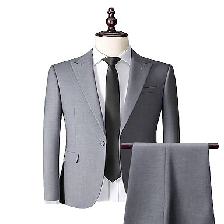

In [44]:
img

In [45]:
img_array=image.img_to_array(img)

In [46]:
img_array.shape

(224, 224, 3)

In [47]:
expanded_img_array=np.expand_dims(img_array,axis=0)
expanded_img_array.shape

(1, 224, 224, 3)

In [48]:
expanded_img_array

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

Image change from RGB to BGR

In [49]:
preprocessed_img=preprocess_input(expanded_img_array)
preprocessed_img

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [50]:
preprocessed_img.shape


(1, 224, 224, 3)

In [51]:
model.predict(preprocessed_img)

1/1 [==============================] - 1s 1s/step


array([[0.7048548 , 0.5460777 , 0.56666887, ..., 0.55550236, 0.39201456,
        0.10434559]], dtype=float32)

In [52]:
model.predict(preprocessed_img).shape

1/1 [==============================] - 0s 126ms/step


(1, 2048)

Make it 1D

In [53]:
model.predict(preprocessed_img).flatten().shape

1/1 [==============================] - 0s 127ms/step


(2048,)

#### Now we do normalization

In [54]:
norm(model.predict(preprocessed_img).flatten())

1/1 [==============================] - 0s 121ms/step


24.036663

In [55]:
model.predict(preprocessed_img).flatten()/norm(model.predict(preprocessed_img).flatten())

1/1 [==============================] - 0s 126ms/step


array([0.02932415, 0.02271853, 0.02357519, ..., 0.02311063, 0.01630903,
       0.0043411 ], dtype=float32)

Now normalization is done

Now we make function for above all steps

In [56]:
def extract_features(img_path,model):
    img=image.load_img(img_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    expanded_img_array=np.expand_dims(img_array,axis=0)
    preprocessed_img=preprocess_input(expanded_img_array)
    result=model.predict(preprocessed_img).flatten()
    normalized_result=result/norm(result)
    
    return normalized_result
    

#### Above function is used for feature extraction of user clothes

In [57]:
print(os.listdir('mydata'))

['1482bf46f9ad265784c6278007d78020.jpg', '3252e985d84ab28b61295271a6ce6ce0.jpg', '597c22d13930a65e5d5fc2f0e106a04c.jpg', '730fff8a7a8a5522ba5bcebb5a84168f.jpg', '797f4a2989ce5eebd75dac6622d99109.jpg', '975759dd86e6117a42462c6a135f50f2.jpg', 'a3c0a7f73a6aed80111a4f68e2d89b25.jpg', 'Do you like the sweater？.jpeg', 'WhatsApp Image 2024-02-08 at 22.14.51_25f4da48.jpg', 'WhatsApp Image 2024-02-08 at 22.15.00_24bc5885.jpg', 'WhatsApp Image 2024-02-08 at 23.04.51_559e1743.jpg', 'WhatsApp Image 2024-02-08 at 23.04.51_aa704b50.jpg', 'WhatsApp Image 2024-02-08 at 23.04.52_b05d2118.jpg', 'WhatsApp Image 2024-02-14 at 23.01.42_f750d6e9.jpg', 'WhatsApp Image 2024-02-14 at 23.01.42_f750d6e91.jpg']


In [58]:
filenames=[]
for file in os.listdir('mydata'):
    filenames.append(os.path.join('mydata',file))

filenames[:5]

['mydata\\1482bf46f9ad265784c6278007d78020.jpg',
 'mydata\\3252e985d84ab28b61295271a6ce6ce0.jpg',
 'mydata\\597c22d13930a65e5d5fc2f0e106a04c.jpg',
 'mydata\\730fff8a7a8a5522ba5bcebb5a84168f.jpg',
 'mydata\\797f4a2989ce5eebd75dac6622d99109.jpg']

In [59]:
feature_list=[]
for file in filenames:
    feature_list.append(extract_features(file,model))
feature_list=np.array(feature_list)
feature_list

1/1 [==============================] - 0s 132ms/step


array([[0.02875195, 0.02646828, 0.02992547, ..., 0.01451026, 0.01320532,
        0.00190454],
       [0.0242915 , 0.02971497, 0.02036844, ..., 0.02519054, 0.01799223,
        0.0052274 ],
       [0.02932415, 0.02271853, 0.02357519, ..., 0.02311063, 0.01630903,
        0.0043411 ],
       ...,
       [0.03062325, 0.02350503, 0.02849238, ..., 0.02382632, 0.0206184 ,
        0.00729666],
       [0.032991  , 0.03070919, 0.02003471, ..., 0.02229644, 0.02275538,
        0.00254742],
       [0.03216326, 0.02680486, 0.02126546, ..., 0.01328379, 0.02169634,
        0.00179452]], dtype=float32)

# Test

In [60]:
test_img_path="dataset/casual_men_winter/test1.jpg"




In [61]:
test_img_feature=extract_features(test_img_path,model)
test_img_feature

1/1 [==============================] - 0s 184ms/step


array([0.02741534, 0.02471338, 0.02821303, ..., 0.0238344 , 0.01740442,
       0.00662276], dtype=float32)

### Check similarities

In [62]:
from sklearn.neighbors import NearestNeighbors


In [63]:
import cv2
import matplotlib.pyplot as plt

In [64]:
neighbors=NearestNeighbors(n_neighbors=10,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [65]:
distances,indices=neighbors.kneighbors([test_img_feature])

In [66]:
indices

array([[ 9, 12,  5, 10, 14,  4,  6,  1,  3, 11]], dtype=int64)

In [67]:
for file_idx in indices[0]:
    print(filenames[file_idx])   

mydata\WhatsApp Image 2024-02-08 at 22.15.00_24bc5885.jpg
mydata\WhatsApp Image 2024-02-08 at 23.04.52_b05d2118.jpg
mydata\975759dd86e6117a42462c6a135f50f2.jpg
mydata\WhatsApp Image 2024-02-08 at 23.04.51_559e1743.jpg
mydata\WhatsApp Image 2024-02-14 at 23.01.42_f750d6e91.jpg
mydata\797f4a2989ce5eebd75dac6622d99109.jpg
mydata\a3c0a7f73a6aed80111a4f68e2d89b25.jpg
mydata\3252e985d84ab28b61295271a6ce6ce0.jpg
mydata\730fff8a7a8a5522ba5bcebb5a84168f.jpg
mydata\WhatsApp Image 2024-02-08 at 23.04.51_aa704b50.jpg


## Evaluation

In [68]:
def display_img(path):
    #t=cv2.imread(path)
    #plt.axis('off')
    #plt.imshow(t)
    #plt.show()
    img=image.load_img(path,target_size=(224,224))
    return img

### Input

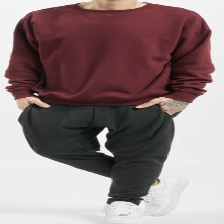

In [69]:

display_img(test_img_path)

### Output

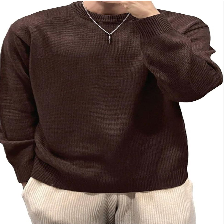

In [70]:
display_img(filenames[indices[0][0]])

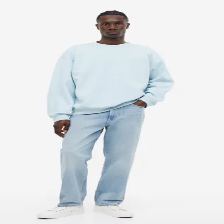

In [71]:
display_img(filenames[indices[0][1]])

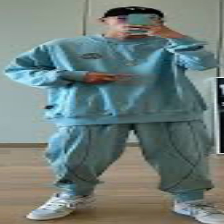

In [72]:
display_img(filenames[indices[0][3]])

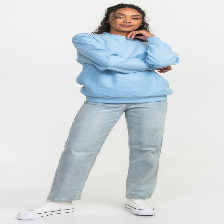

In [73]:
display_img(filenames[indices[0][-1]])

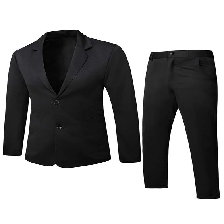

In [74]:
display_img(filenames[indices[0][-2]])